In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
def convert_data_frame(data):
    data_dict = {}
    for index, row in data.iterrows():
        now_index = row["num_vertices"], row["num_edges"]
        if now_index not in data_dict:
            data_dict[now_index] = []
        data_dict[now_index].append(row["compare_count"])
    average_list = []
    for key, value in data_dict.items():
        average_list.append(
            {
                "num_vertices": key[0],
                "num_edges": key[1],
                "average": sum(value) / len(value),
            }
        )
    average_data = pd.DataFrame.from_dict(average_list, orient="columns")
    return average_data

In [135]:
def eval_num_vertices(file_name):
    data = pd.read_csv(file_name)
    data = convert_data_frame(data)
    sns.lineplot(x="num_vertices", y="average", data=data)
    return data

In [136]:
def eval_num_edges(file_name):
    data = pd.read_csv(file_name)
    data = convert_data_frame(data)
    sns.lineplot(x="num_edges", y="average", data=data)
    return data

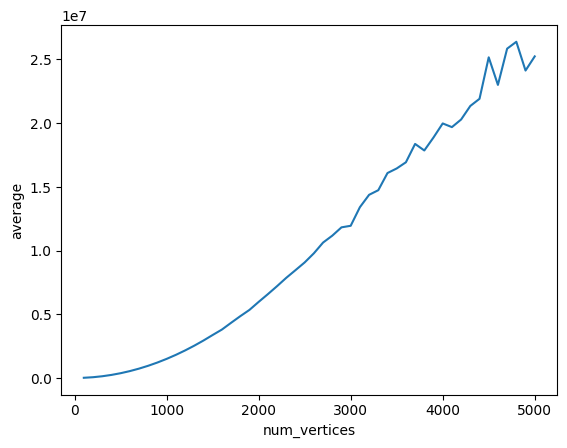

In [137]:
data = eval_num_vertices("./diff_vertex_matrix.csv")

In [138]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(data[["num_vertices"]])
y = data["average"]
lg = LinearRegression()
lg.fit(X, y)
print(lg.coef_)
expected = lg.predict(X)
data["expected"] = expected

[0.00000000e+00 2.74286781e+03 6.03343824e-01]


<Axes: xlabel='num_vertices', ylabel='expected'>

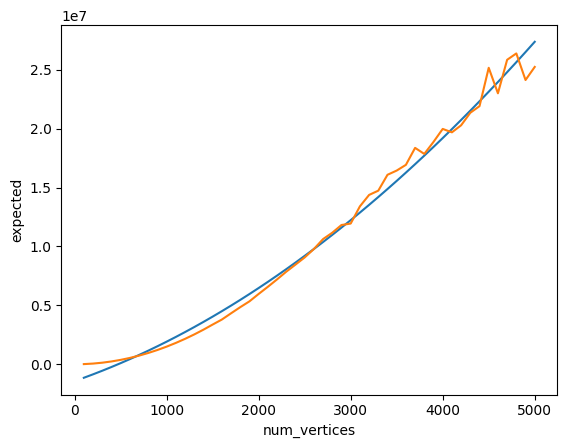

In [139]:
sns.lineplot(x="num_vertices", y="expected", data=data)
sns.lineplot(x="num_vertices", y="average", data=data)

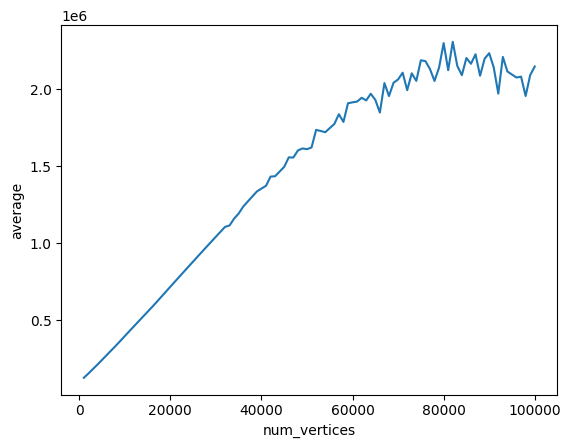

In [140]:
vertex_list = eval_num_vertices("./diff_vertex_list.csv")

In [141]:
import math

vertex_list["V_log_V"] = vertex_list["num_vertices"] * vertex_list[
    "num_vertices"
].apply(lambda x: math.log(x, 2))
vertex_list["E_log_V"] = vertex_list["num_edges"] * vertex_list["num_vertices"].apply(
    lambda x: math.log(x, 2)
)
vertex_list_bak = vertex_list.copy()

In [142]:
# Do linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(
    vertex_list[["V_log_V", "E_log_V"]], vertex_list["average"]
)
print(reg.coef_)

[0.770432   1.08882654]


In [143]:
vertex_list["expected"] = reg.predict(vertex_list[["V_log_V", "E_log_V"]])

<Axes: xlabel='num_vertices', ylabel='expected'>

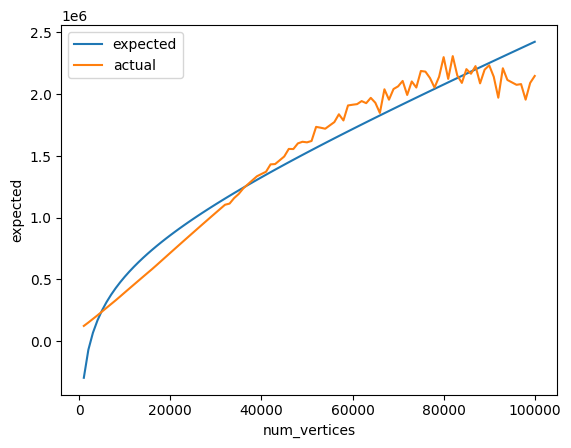

In [144]:
sns.lineplot(x="num_vertices", y="expected", data=vertex_list, label="expected")
sns.lineplot(x="num_vertices", y="average", data=vertex_list, label="actual")

In [145]:
vertex_list = vertex_list_bak.copy()
train_data = vertex_list[vertex_list["num_vertices"] < 40000]

In [146]:
reg = LinearRegression().fit(train_data[["V_log_V", "E_log_V"]], train_data["average"])
print(reg.coef_)

[1.98047116 0.05876973]


<Axes: xlabel='num_vertices', ylabel='expected'>

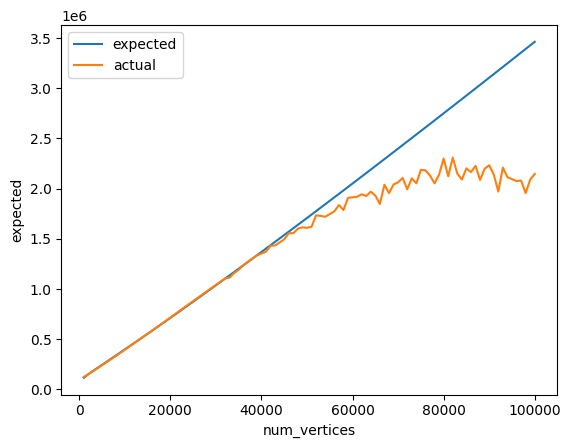

In [147]:
vertex_list["expected"] = reg.predict(vertex_list[["V_log_V", "E_log_V"]])
sns.lineplot(x="num_vertices", y="expected", data=vertex_list, label="expected")
sns.lineplot(x="num_vertices", y="average", data=vertex_list, label="actual")

<Axes: xlabel='num_vertices', ylabel='expected'>

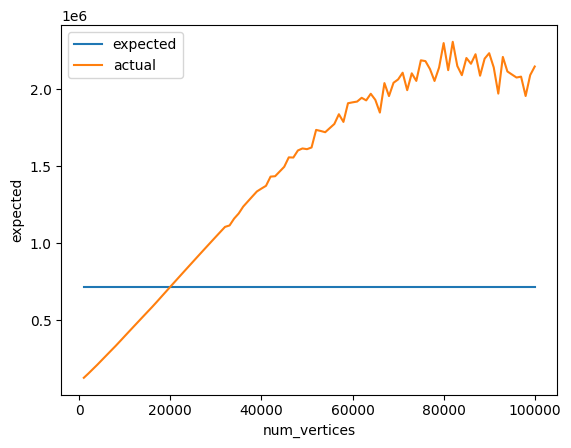

In [154]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
reg = svr.fit(train_data[["V_log_V", "E_log_V"]], train_data["average"])

vertex_list["expected"] = reg.predict(vertex_list[["V_log_V", "E_log_V"]])
sns.lineplot(x="num_vertices", y="expected", data=vertex_list, label="expected")
sns.lineplot(x="num_vertices", y="average", data=vertex_list, label="actual")

,num_vertices,num_edges,average
0,1000,10000,1498500.0
1,1000,20000,1498500.0
2,1000,30000,1498500.0
3,1000,40000,1498500.0
4,1000,50000,1498500.0
...,...,...,...
95,1000,960000,1498500.0
96,1000,970000,1498500.0
97,1000,980000,1498500.0
98,1000,990000,1498500.0


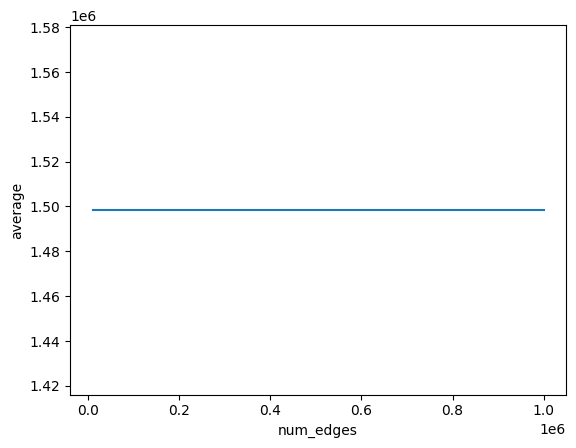

In [148]:
eval_num_edges("./diff_edge_matrix.csv")

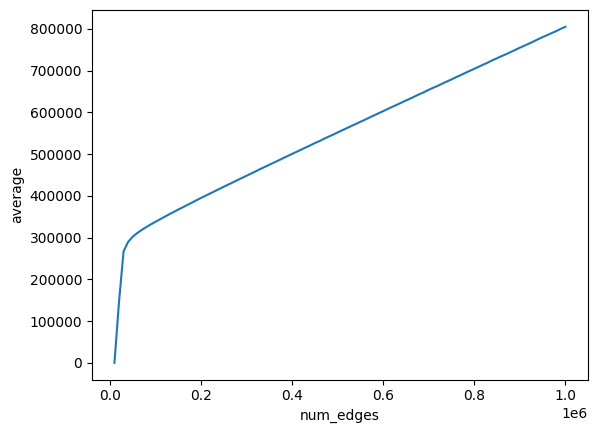

In [149]:
edge_list = eval_num_edges("./diff_edge_list.csv")

In [150]:
edge_list.head()

,num_vertices,num_edges,average
0,10000,10000,44.4
1,10000,20000,145660.5
2,10000,30000,266967.8
3,10000,40000,289613.4
4,10000,50000,301998.4


[-1.11374934e-34  3.87104105e-02]


<Axes: xlabel='num_edges', ylabel='expected'>

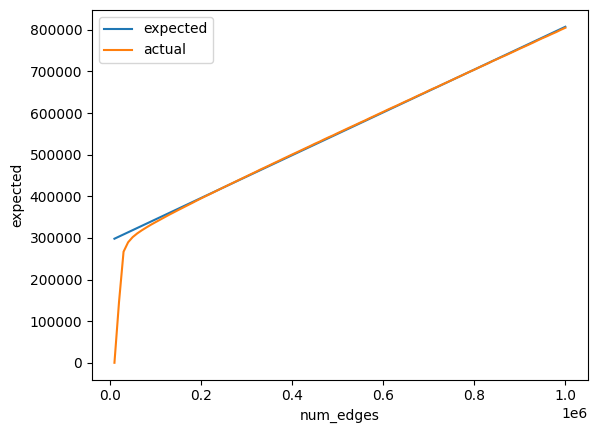

In [151]:
edge_list["V_log_V"] = edge_list["num_vertices"] * edge_list["num_vertices"].apply(
    lambda x: math.log(x, 2)
)
edge_list["E_log_V"] = edge_list["num_edges"] * edge_list["num_vertices"].apply(
    lambda x: math.log(x, 2)
)
edge_list_bak = edge_list.copy()
edge_list = edge_list[edge_list["num_edges"] > 1e5]
reg = LinearRegression().fit(edge_list[["V_log_V", "E_log_V"]], edge_list["average"])
print(reg.coef_)
edge_list = edge_list_bak.copy()
edge_list["expected"] = reg.predict(edge_list[["V_log_V", "E_log_V"]])
sns.lineplot(x="num_edges", y="expected", data=edge_list, label="expected")
sns.lineplot(x="num_edges", y="average", data=edge_list, label="actual")